## KNN Implementation

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt 

In [3]:
a = np.arange(1,100 ,1)
b = np.arange(101,200 , 1)
print(a.shape , b.shape)

(99,) (99,)


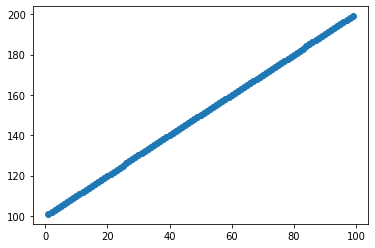

In [4]:
plt.scatter(a , b )
plt.show()

In [17]:
X = np.load("E:\PYTHON_BASIC\Data Science\KNN\Classification\X_data.npy")
y = np.load("E:\PYTHON_BASIC\Data Science\KNN\Classification\Y_data.npy")

In [18]:
print(X.shape , y.shape)

(500, 2) (500,)


In [7]:
X[0]

array([-3.54122245,  3.10356106])

In [8]:
X[0,:1]

array([-3.54122245])

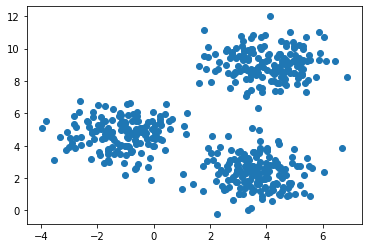

In [9]:
f1 = X[:,0]  
f2 = X[:,1]
plt.scatter(f1 , f2 )
plt.show() #it clears the buffer , to show the plot

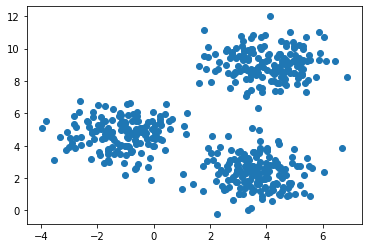

In [10]:
plt.scatter(X[:,0] , X[:,1])
plt.show()

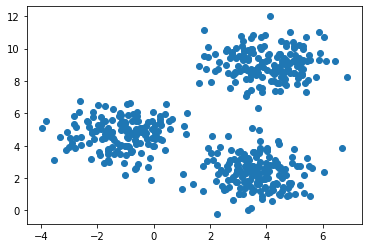

In [11]:
plt.scatter(X[:,0] , X[:,1] , )
plt.show()

#### 7/12/2021

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
## making absolute path for data set
X = np.load("E:\PYTHON_BASIC\Data Science\KNN\Classification\X_data.npy")
y = np.load("E:\PYTHON_BASIC\Data Science\KNN\Classification\Y_data.npy")

In [14]:
## printing the shape of data set to check the table are right or not
print(X.shape , y.shape)

(500, 2) (500,)


In [18]:
X.shape

(500, 2)

In [19]:
X[0]

array([-3.54122245,  3.10356106])

In [20]:
X[0].shape

(2,)

In [21]:
X.shape[0]

500

In [15]:
print(y)

[2 0 0 0 0 1 2 0 1 2 1 1 1 2 2 1 2 2 0 1 1 1 1 1 1 0 2 2 2 2 1 0 2 2 1 0 0
 0 0 2 1 1 2 1 1 1 0 2 2 2 1 1 1 0 2 0 0 1 1 0 2 0 2 1 0 2 2 2 1 0 1 0 2 2
 1 1 2 2 1 2 0 2 2 2 1 1 1 1 1 2 2 2 1 2 2 2 0 1 0 0 2 2 2 2 0 0 1 2 0 1 1
 1 0 1 2 0 2 1 2 0 2 1 2 2 2 0 1 2 1 1 0 1 1 1 1 1 0 1 0 0 1 0 2 0 0 2 0 2
 2 2 2 1 2 1 0 2 1 0 1 2 2 2 2 0 2 2 2 0 2 1 2 0 0 1 1 0 0 1 0 1 1 2 0 0 2
 0 1 0 0 0 1 2 1 0 1 1 2 0 0 1 0 2 1 2 1 0 1 0 0 1 0 1 2 1 2 2 1 2 0 1 2 1
 1 0 0 0 2 0 2 2 1 1 0 1 1 1 0 0 0 2 0 0 2 0 1 1 1 2 1 2 2 0 2 2 2 0 0 0 2
 2 2 0 1 2 2 0 2 2 0 2 1 0 0 0 0 2 1 1 1 2 0 0 1 1 2 0 1 0 0 2 2 2 1 1 0 1
 0 2 2 0 0 1 1 2 0 1 2 1 0 2 1 1 0 1 1 0 1 1 2 0 1 1 2 2 0 0 2 2 2 0 0 0 1
 1 0 1 1 2 0 0 2 1 2 0 1 0 1 0 1 1 0 2 2 2 1 0 1 0 1 0 0 2 0 1 2 0 2 0 0 0
 1 2 2 2 0 0 2 0 2 0 1 0 1 0 2 2 0 1 0 0 0 2 1 1 1 0 0 2 0 1 1 2 0 1 1 2 0
 1 1 1 0 0 1 2 2 0 1 0 1 2 2 1 2 0 1 0 0 1 2 2 2 0 0 1 0 0 2 1 2 1 1 0 2 0
 1 2 1 2 1 2 1 2 2 0 1 0 0 2 0 0 1 0 2 2 1 1 2 2 2 0 0 1 1 2 0 1 2 0 0 0 0
 2 2 2 0 2 1 1 2 1 1 1 0 

In [5]:
class KNN:
    
    def __init__(self,k=3):
        self.k = k
    
    def get_distance(self,pt1,pt2):
        return   ((pt1[0] - pt2[0])**2 + (pt1[1]-pt2[1])**2)**0.5
    
    def predict(self,xtrain , ytrain , xtest):
        # 1. we need to compute distance btw each point with test point
        distance = []
        
        for i in range(xtrain.shape[0]):   #xtrain.shape[0] it will run for 500 times
            d = self.get_distance(xtrain[i] , xtest)
            distance.append([d , i])   # passing two things distance , as well as the index of the value
            
        #2.get the k-nearest neighbour
     #   knn = sorted(distance , key = lambda el:el[0])[:self.k]
        knn =  sorted(distance , key =lambda el:el[0])[:self.k]
        
        #3.get the category of k nearest neighbour
        k_cat = {}
        for el in knn:
            cat = y[el[1]]
            if k_cat.get(cat) == None:
                k_cat[cat] = 1
            else:
                k_cat[cat] += 1
        
        #get the category with max sample count
        max = 0
        pred = [0 , 0]
        for cat,freq in k_cat.items():  #.items to get the value inside a dict
            if freq > max:
                pred = [cat , freq]
                max = freq
        
        return pred[0] , pred[1]/self.k
  # we are returning the label of the test point and it's confidence                
    

In [6]:
test_point = [2,6]
model = KNN(3)

In [8]:
model.predict(X, y , test_point)

(2, 0.6666666666666666)

In [22]:
np.unique(y)

array([0, 1, 2])

In [24]:
np.unique(y , return_counts = True)

(array([0, 1, 2]), array([167, 167, 166], dtype=int64))

In [3]:
# we need to short the distance array using 
dist = [[3.12 , 0] , [2.4 , 1] , [6.7 , 1] ,[2.3 , 2] , [2.3 , 0]]
print(dist)

[[3.12, 0], [2.4, 1], [6.7, 1], [2.3, 2], [2.3, 0]]


In [4]:
sorted(dist)

[[2.3, 0], [2.3, 2], [2.4, 1], [3.12, 0], [6.7, 1]]

In [8]:
sorted(dist , key=lambda el:el[0]) 

[[2.3, 2], [2.3, 0], [2.4, 1], [3.12, 0], [6.7, 1]]

In [11]:
sorted(dist , key=lambda el:el[0])

[[2.3, 2], [2.3, 0], [2.4, 1], [3.12, 0], [6.7, 1]]

In [12]:
sorted(dist , key=lambda el:el[0])[:3]

[[2.3, 2], [2.3, 0], [2.4, 1]]

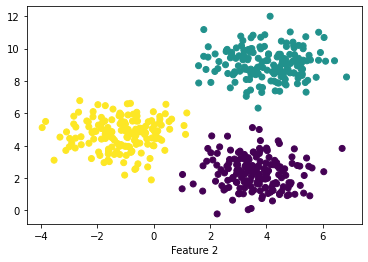

In [9]:
## let make the map of the training data
plt.scatter(X[:,0] , X[:,1] , c = y )
x = plt.xlabel("Feature 1")
y = plt.xlabel("Feature 2")
plt.show()

In [17]:
color_map  = {0:'red' , 1:'yellow' , 2:'orange'} # key represent label/category
colors = []
for label in y:
    colors.append(color_map[label])
print(colors[:10]) # printing first 10 colors
print(y[:10])

TypeError: 'Text' object is not iterable

In [ ]:
## we are creating a color map here
color_map = {0:"green" , 1:"red" , 2:"blue"}
colors = []
a1 = np.array(y)
for i in a1:
    colors.append(color_map[i])
print(colors)

In [ ]:
dist = [[3.12 , 0] , [2.4 , 1] , [6.7 , 1] ,[2.3 , 2] , [2.3 , 0]]
print(dist)


### KNN Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# bringing the training dataset
X = np.load("E:\PYTHON_BASIC\Data Science\KNN\Classification\X_data.npy")  # training data set containing features
y = np.load("E:\PYTHON_BASIC\Data Science\KNN\Classification\Y_data.npy")  # training data set containing label

In [4]:
print(X.shape , y.shape)

(500, 2) (500,)


In [32]:
print(type(y))

<class 'numpy.ndarray'>


In [23]:
color_set = {0:"red" , 1:"green" , 2:"blue"}
colors = []
for i in y:
    colors.append(color_set.get(i))
a = np.array(colors)
print(a)

['blue' 'red' 'red' 'red' 'red' 'green' 'blue' 'red' 'green' 'blue'
 'green' 'green' 'green' 'blue' 'blue' 'green' 'blue' 'blue' 'red' 'green'
 'green' 'green' 'green' 'green' 'green' 'red' 'blue' 'blue' 'blue' 'blue'
 'green' 'red' 'blue' 'blue' 'green' 'red' 'red' 'red' 'red' 'blue'
 'green' 'green' 'blue' 'green' 'green' 'green' 'red' 'blue' 'blue' 'blue'
 'green' 'green' 'green' 'red' 'blue' 'red' 'red' 'green' 'green' 'red'
 'blue' 'red' 'blue' 'green' 'red' 'blue' 'blue' 'blue' 'green' 'red'
 'green' 'red' 'blue' 'blue' 'green' 'green' 'blue' 'blue' 'green' 'blue'
 'red' 'blue' 'blue' 'blue' 'green' 'green' 'green' 'green' 'green' 'blue'
 'blue' 'blue' 'green' 'blue' 'blue' 'blue' 'red' 'green' 'red' 'red'
 'blue' 'blue' 'blue' 'blue' 'red' 'red' 'green' 'blue' 'red' 'green'
 'green' 'green' 'red' 'green' 'blue' 'red' 'blue' 'green' 'blue' 'red'
 'blue' 'green' 'blue' 'blue' 'blue' 'red' 'green' 'blue' 'green' 'green'
 'red' 'green' 'green' 'green' 'green' 'green' 'red' 'green' '

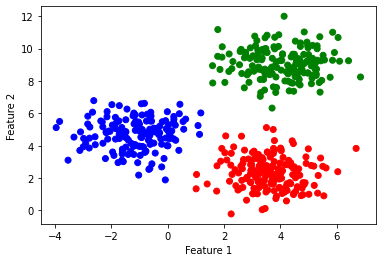

In [50]:
plt.scatter(X[:,0] , X[:,1] , c = a )
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#### to add label using legend()

In [52]:
s = set(y)
print(s)

{0, 1, 2}


In [97]:
num = np.unique(y)
print(num)

[0 1 2]


In [96]:
num = np.unique(y)   ## return the frequency of occurence of 1 , 2  ,0 in y
print(num)

[0 1 2]


In [93]:
 num = np.unique(y, return_counts=True)
 print(num)

(array([0, 1, 2]), array([167, 167, 166], dtype=int64))


In [94]:
num_arr = np.unique(y)
print(num_arr)

[0 1 2]


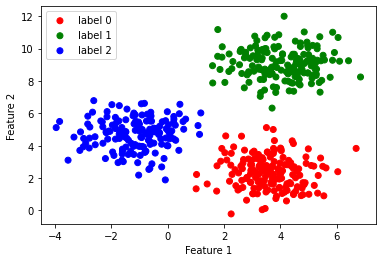

In [95]:
for i in num_arr:      
    bool_idx = y == i ## subsetting based on i value returning boolean value
    plt.scatter(X[bool_idx,0] , X[bool_idx,1] , c= a[bool_idx] , label = f"label {i}")  ## a is an array##########################
 
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [77]:
for i in num:
    print(i)

[{0, 1, 2}]
[1]


In [98]:
X.shape[0]

500

## KNN classification

In [18]:
class KNN:
    
    def __init__(self , k =3):
        self.k = k
        
    def get_distance(self , p1 , p2):
        return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    
    def predict(self , xtrain , ytrain , test_point):
        
        distance = []
        for el in range(xtrain.shape[0]):          ###################################################
            d = self.get_distance(xtrain[el] , test_point)
            distance.append([d,el])
            
        sort_dis = sorted(distance , key = lambda el:el[0])[:self.k]
        
        ## frequency
        dict_of_occurence = {}
        for i in sort_dis:
            x = y[i[1]] ################################ with help of index trying to find the value
            if dict_of_occurence.get(x) == None:
                dict_of_occurence[x] = 1
            else:
                dict_of_occurence[x] += 1
                
        max = 0
        precdicty = [0 , 0]
        for val , freq in dict_of_occurence.items(): #############to unpack the dict .items is used
            if freq > max:
                precdicty = [val , freq]
                max = freq
                
        return precdicty[0] ,precdicty[1]/self.k
        
         # get the category with max sample count in knn        
            

In [14]:
test = [2,6]
model = KNN()

In [19]:
model.predict(X , y , test)

(2, 0.6666666666666666)

In [22]:
arr1 = np.unique(y)
print(arr1)

[0 1 2]


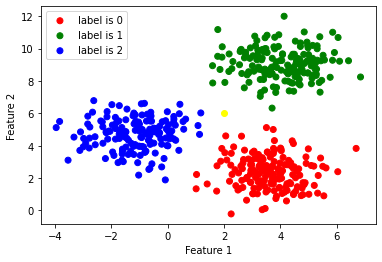

In [32]:
for i in arr1:
    idx = y == i
    plt.scatter(X[idx,0] , X[idx,1] , c =a[idx] ,  label = f"label is {i}")
plt.legend()

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(test[0] , test[1] , c = "yellow" )
plt.show()

### plotting the decision boundary

In [48]:
## generating points and then predicting there values
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)

print(f1.shape , f2.shape)
f1 , f2 = np.meshgrid(f1 , f2)
print(f1.shape , f2.shape)

f1 = f1.flatten()
f2 = f2.flatten()
print(f1.shape , f2.shape)

predictions1 = []
for testpoint in zip(f1 , f2):
    x = model.predict(X , y , testpoint)
    predictions1.append(x[0])

for i in arr1:
    idx = y == i
    plt.scatter(f1 , f2 , c =a[idx] ,  label = f"label is {i}")
plt.legend()

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(test[0] , test[1] , c = "yellow" )
plt.show()



(100,) (100,)
(100, 100) (100, 100)
(10000,) (10000,)


In [39]:
a = [1 , 2 ,3 ,4]
b = [1 , 2 ,3 ,4]

a,b = np.meshgrid(a,b)

print(a , "\n" , b)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]] 
 [[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]


In [40]:
a.shape

(4, 4)

In [42]:
## to flatten it
a.reshape(-1 , )

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [43]:
a.flatten()

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [44]:
print(a.flatten())
print(b.flatten())

[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]
